In [2]:
import pandas as pd

df = pd.read_csv("company_website_second_round_with_additional_firms.csv")
print(df.columns)

Index(['Unnamed: 0', 'std_name', 'company_name', 'company_website_link',
       'Made_in_USA_related_info_link', 'notes', 'list_order', 'list_title',
       'list_link', 'Title_List_Name',
       ...
       '1997-07', '1997-06', '1997-05', '1997-04', '1997-03', '1997-02',
       '1997-01', '1996-12', '1996-11', '1996-10'],
      dtype='object', length=339)


/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_80286/1280922479.py:3: DtypeWarning: Columns (300,304,325,328) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("company_website_second_round_with_additional_firms.csv")


In [3]:
selected_cols = reversed([col for col in df.columns if col.startswith("1") or col.startswith("2")])
df = df[selected_cols]
print(df.columns)

Index(['1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07',
       ...
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10'],
      dtype='object', length=325)


In [4]:
keywords = [
    "anti import",
    "anti-import",
    "anti smuggling",
    "china",
    "chinese",
    "border watch",
    "cut sewn",
    "deglobalization",
    "design manufacture",
    "domestic manufacturing",
    "dumping",
    "export control",
    "foreign",
    "friend shoring",
    "fueling american economy",
    "global parts",
    "global sourcing",
    "homegrown",
    "import ban",
    "import duty",
    "import export regulations",
    "import quotas",
    "import tariffs",
    "imported components",
    "imported goods",
    "imported products",
    "imports",
    "india",
    "ingenuity",
    "inspection",
    "international competitors",
    "international goods",
    "international orders",
    "maintain american factories",
    "manufacturing facility",
    "manufacturing process",
    "mexico",
    "mexican",
    "nationally",
    "non us made",
    "non-u.s. made",
    "offshore",
    "offshoring",
    "outsourcing",
    "outsourced production",
    "overseas",
    "owned operated",
    "production facility",
    "protectionism",
    "protectionist measures",
    "reshore",
    "reshoring",
    "right here",
    "self sufficiency",
    "self-sufficiency",
    "support usa",
    "supporting",
    "taiwan",
    "trade barrier",
    "trade deficit",
    "trade war",
    "u s  based production",
    "us based company",
    "weaponizing trade",
    "prefer domestic",
    "prefers domestic",
    "preferring domestic",
    "choose domestic",
    "chooses domestic",
    "choosing domestic",
    "only domestic",
    "domestic only",
    "domestically only",
    "not outsourc",
    "doesn't outsource",
    "dont outsourc",
    "don't outsourc",
    "never outsourc",
    "refus outsourc",
    "refusing outsourc",
    "no import",
    "not import",
    "doesn't import",
    "dont import",
    "don't import",
    "never import",
    "stop import",
    "halt import",
    "refuse import",
    "refus import",
    "refusing import",
    "ban import",
    "block import",
    "america first",
    "american first",
    "american sovereignty",
    "secure america supply chain",
    "maintain america supply chain",
    "keep america working",
    "keep americans employed"
]

In [7]:
from tqdm import tqdm
import swifter

df = df.astype(str)
total_count_df = pd.DataFrame(0, index=df.index, columns=df.columns)
for keyword in tqdm(keywords):
    count_df = df.swifter.apply(lambda x: x.str.count(keyword)).fillna(0)
    total_count_df += count_df

/opt/anaconda3/envs/research/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [02:37<00:00,  1.57s/it]


In [8]:
import numpy as np
def propagate_int_value_forward(df):
    df = df.copy()
    df.mask(df <= 0, np.nan, inplace=True) # mask the values less than zero
    df = df.T.ffill(axis=0).T # forward fill so that the values that are np.nan get the closest preceding value in terms of columns - axis=1 leads to NotImplementedError
    df.fillna(0, inplace=True) # fill the remaining np.nan with 0
    return df

In [9]:
exists_counts = df.apply(lambda x: x.str.len() > 10).fillna(0)

In [10]:
total_count_df = propagate_int_value_forward(total_count_df)
total_count_df.sum(axis=0)

1996-10       1.0
1996-11       2.0
1996-12      11.0
1997-01      11.0
1997-02      12.0
            ...  
2023-06    2378.0
2023-07    2388.0
2023-08    2404.0
2023-09    2407.0
2023-10    2422.0
Length: 325, dtype: float64

In [11]:
exists_df = propagate_int_value_forward(exists_counts)
exists_df.sum(axis=0)

1996-10      14
1996-11      60
1996-12     230
1997-01     238
1997-02     246
           ... 
2023-06    4569
2023-07    4569
2023-08    4575
2023-09    4578
2023-10    4582
Length: 325, dtype: object

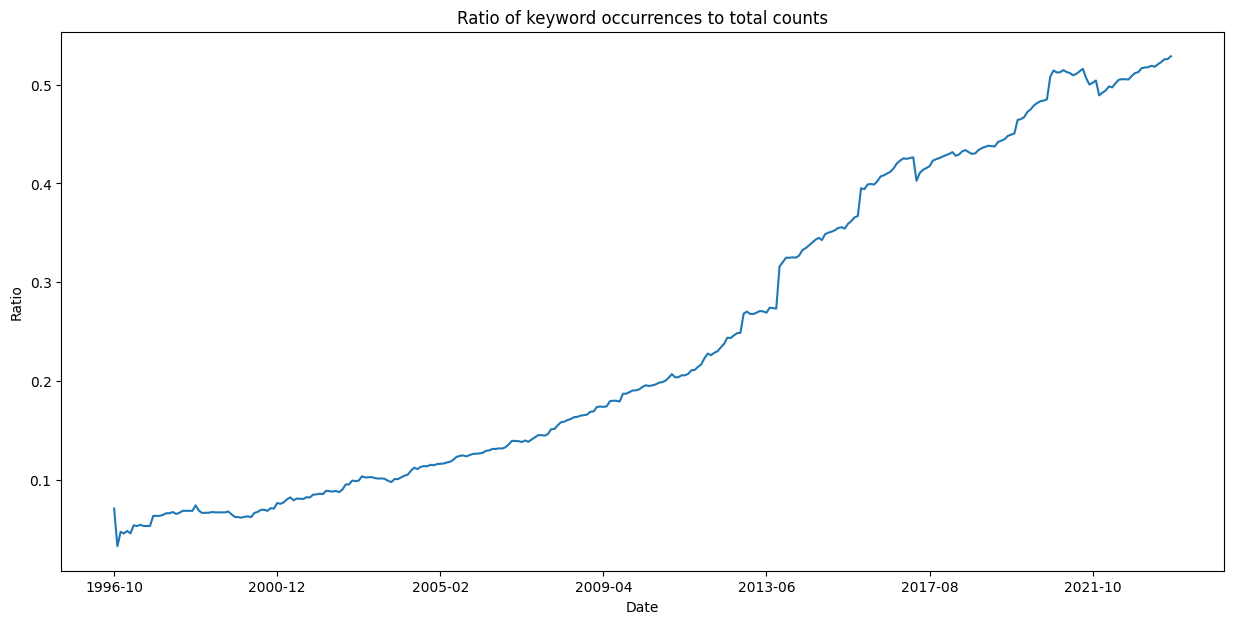

In [13]:
result = total_count_df.sum(axis=0) / exists_df.sum(axis=0)
import matplotlib.pyplot as plt

result.plot(kind='line', figsize=(15, 7))
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio of keyword occurrences to total counts')
plt.show()